## Predicting Car prices
----------------------
In this project, we will predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. 

We can read more about the data set [here][1] and can download it directly from [here][2].

[1]: https://archive.ics.uci.edu/ml/datasets/automobile
[2]: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In [1]:
import pandas as pd
import numpy as np

#Setting
pd.options.display.max_columns = 30

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
col_names = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location",
"wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke",
"compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

cars = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", header=None,names=col_names)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


We shall consider below columns with continuous values as `feature columns`:

1. normalized-losses
2. wheel-base
3. length
4. width
5. height
6. curb-weight
7. bore
8. stroke
9. compression-ratio
10. horsepower
11. peak-rpm
12. city-mpg
13. highway-mpg

And below column will be `target column`:
1. Price
------------------

### Data Cleaning

- Let's remove other unwanted columns
- Replace '?' with 'NaN'
- Covert columns datatypes to int/float
- Rescale values in the numeric columns

In [3]:
continuous_cols = ["normalized-losses","wheel-base","length","width","height","curb-weight","bore","stroke",
"compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

numeric_cars = cars[continuous_cols]
numeric_cars.head(2)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500


In [4]:
numeric_cars = numeric_cars.replace('?',np.nan)
numeric_cars.head(2)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500


In [5]:
numeric_cars = numeric_cars.astype(float)
numeric_cars.isna().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
# as "price" is our target column lets remove NaN from it first and replace other NaN values with column mean
numeric_cars = numeric_cars.dropna(subset=["price"])
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isna().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col
numeric_cars.head(2)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125,0.294393,0.346939,0.222222,0.289474,16500.0


In [8]:
# now lets try to predict using univariate KNN model

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score



def knn_train_test(train_col, target_col, df, k=5):
    knn = KNeighborsRegressor(n_neighbors=k)
    kf = KFold(n_splits=2, shuffle=True, random_state=1)
    mses = cross_val_score(knn, df[train_col], df[target_col],scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.abs(mses))
    return np.mean(rmses)

# rmse for predictiong using each column
col_rmse = {}
uni_cols = numeric_cars.columns.drop("price")
for col in uni_cols:
    col_rmse[col] = knn_train_test([col], 'price', numeric_cars)
    
col_rmse_series = pd.Series(col_rmse)
col_rmse_series.sort_values()
print("best model out of all univariate KNN model -", min(col_rmse,key=col_rmse.get),":",col_rmse[min(col_rmse,key=col_rmse.get)])

horsepower           3983.289877
curb-weight          4130.915690
highway-mpg          4336.427993
width                4480.755962
city-mpg             4788.022045
length               5645.803155
wheel-base           5709.567683
bore                 6561.161516
compression-ratio    6875.609561
normalized-losses    7482.632289
peak-rpm             7721.986452
height               7735.811797
stroke               7768.258096
dtype: float64

best model out of all univariate KNN model - horsepower : 3983.2898772021913


In [9]:
# lets vary the k value and see how the result changes

k = list(np.arange(1,10,2))
col_k_rmses = {}

for col in uni_cols:
    k_rmses = {}
    for val in k:
        k_rmses[val] = knn_train_test([col], 'price', numeric_cars, k=val)
    col_k_rmses[col] = k_rmses
    
col_k_rmses

{'bore': {1: 7621.538208760644,
  3: 6437.139676823377,
  5: 6561.161516346088,
  7: 6634.459205363681,
  9: 6697.647393148453},
 'city-mpg': {1: 5871.920826750951,
  3: 4727.348409434364,
  5: 4788.02204494846,
  7: 4939.508734499681,
  9: 4858.913093452284},
 'compression-ratio': {1: 8499.42788265848,
  3: 7112.2506526982925,
  5: 6875.609561238276,
  7: 6834.8632068665365,
  9: 6837.759359617571},
 'curb-weight': {1: 5480.3387464948755,
  3: 4564.972121550114,
  5: 4130.915690353671,
  7: 4048.463958309884,
  9: 4265.530904180105},
 'height': {1: 10146.330793428593,
  3: 8275.871971047809,
  5: 7735.811797200045,
  7: 7819.5009556460045,
  9: 7722.600515996639},
 'highway-mpg': {1: 6115.698685284922,
  3: 4579.039307478401,
  5: 4336.427992998121,
  7: 4478.246829254598,
  9: 4589.306114328255},
 'horsepower': {1: 4596.356051035821,
  3: 4029.8729687950135,
  5: 3983.2898772021913,
  7: 4275.14947182207,
  9: 4378.258277016718},
 'length': {1: 5289.997393810672,
  3: 5277.1261426786

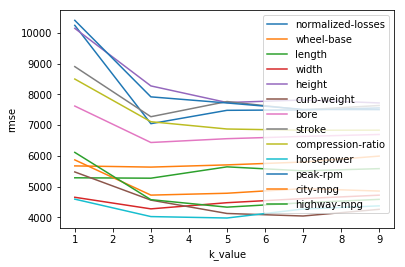

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

legend = []
for k,v in col_k_rmses.items():
    x = list(v.keys())
    y = list(v.values())
    legend.append(k)
    plt.plot(x,y)
    

plt.xlabel("k_value")
plt.ylabel("rmse")
plt.legend(legend, loc='upper right')
plt.show();

In [11]:
## Multivariate model average rmse's

k_average_rmses = {}
for k,v in col_k_rmses.items():
    avg_rmse = np.mean(list(v.values()))
    k_average_rmses[k] = avg_rmse
    
k_avg_rmses_series = pd.Series(k_average_rmses)
k_avg_rmses_series.sort_values()

horsepower           4252.585329
curb-weight          4498.044284
width                4551.611642
highway-mpg          4819.743786
city-mpg             5037.142622
length               5463.366012
wheel-base           5764.317607
bore                 6790.389200
compression-ratio    7231.982133
stroke               7816.659445
normalized-losses    7966.576761
peak-rpm             8213.353860
height               8340.023207
dtype: float64

In [12]:
# lets fix k to default value and vary features and see how the result changes. 
# We shall choose top 6 columns from above and see how rmse changes for different combination of these columns

feature_cols = list(k_avg_rmses_series.sort_values().index[0:6])

feature_cols_rmses = {}
feature_keys = ['Top_1_best_features','Top_2_best_features', 'Top_3_best_features', 'Top_4_best_features', 'Top_5_best_features', 'Top_6_best_features']

for idx, col in enumerate(feature_cols):
    if idx > 0:
        training_cols = feature_cols[0:idx]
        feature_cols_rmses[feature_keys[idx]] = knn_train_test(training_cols, 'price', numeric_cars)
        
feature_cols_rmses_series = pd.Series(feature_cols_rmses)
feature_cols_rmses_series.sort_values()

Top_4_best_features    3189.611202
Top_6_best_features    3242.085862
Top_3_best_features    3267.607705
Top_5_best_features    3278.402973
Top_2_best_features    3983.289877
dtype: float64

In [13]:
# lets vary the k value for top 3 results

k = list(np.arange(1,25))
best_features = [['horsepower',"curb-weight","width"], ['horsepower',"curb-weight","width","highway-mpg"], ['horsepower',"curb-weight","width","highway-mpg","city-mpg","length"]]
best_k_rmses = {}

for bf in best_features:
    bf_k_rmses = {}
    for val in k:
        bf_k_rmses[val] = knn_train_test(bf, 'price', numeric_cars, k=val)
    best_k_rmses[len(bf)] = bf_k_rmses
    
best_k_rmses

{3: {1: 3537.781664297423,
  2: 2903.3021431628604,
  3: 3129.6149754614057,
  4: 3109.9290203576697,
  5: 3189.611201564441,
  6: 3350.246381744897,
  7: 3534.7837535577914,
  8: 3719.4531122715844,
  9: 3798.2247916781125,
  10: 3899.021708892114,
  11: 3970.3512343957927,
  12: 4050.5789744016743,
  13: 4152.665259015134,
  14: 4167.070162391794,
  15: 4160.077206759248,
  16: 4179.935923689316,
  17: 4303.074883466921,
  18: 4369.505179763437,
  19: 4435.925069302546,
  20: 4497.356203587817,
  21: 4566.054840408689,
  22: 4610.005543240664,
  23: 4675.675838758971,
  24: 4722.79266714917},
 4: {1: 3303.3796155630225,
  2: 2838.134395420976,
  3: 3062.077968463259,
  4: 3185.832426739007,
  5: 3278.4029729931435,
  6: 3492.111215528663,
  7: 3712.1959611678726,
  8: 3798.5902828899443,
  9: 3816.1724960869783,
  10: 3907.668932685761,
  11: 4032.1761160517626,
  12: 4126.4102352167265,
  13: 4213.305359058844,
  14: 4182.8587793561865,
  15: 4203.289462176789,
  16: 4267.4883706212

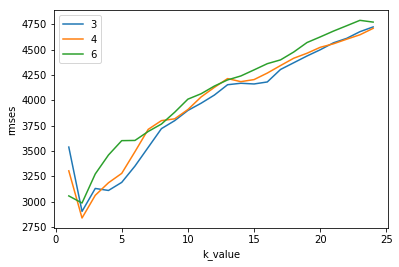

In [14]:
legend = []
for k,v in best_k_rmses.items():
    x = list(v.keys())
    y = list(v.values())
    legend.append(k)
    plt.plot(x,y)
    
plt.xlabel('k_value')
plt.ylabel('rmses')
plt.legend(legend)
plt.show();

## Conclusion
-------------------
The best performing model to predict car prices is when we use below features with K at 2.
- horsepower
- curb-weight
- width
- highway-mpg